In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd

# Try reading the CSV file with a different encoding
try:
    df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
except Exception as e:
    print("Error:", e)


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3667,ham,Thanks for loving me so. You rock,NaN,NaN,NaN
3251,ham,Come to medical college at 7pm ......forward i...,NaN,NaN,NaN
4168,ham,Haven't heard anything and he's not answering ...,NaN,NaN,NaN
4744,spam,Camera - You are awarded a SiPix Digital Camer...,NaN,NaN,NaN
3064,ham,"Sounds good, keep me posted",NaN,NaN,NaN


In [ ]:
# Check existing columns
print("Existing columns:", df.columns)

# Try dropping columns with error handling
try:
    df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
except KeyError as e:
    print("Error:", e)
except Exception as e:
    print("Unexpected error:", e)


Existing columns: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
df.sample(5)

,v1,v2
1842,ham,"\Are you comingdown later?\"""""
2619,spam,<Forwarded from 21870000>Hi - this is your Mai...
182,ham,ok. I am a gentleman and will treat you with d...
4772,ham,Ok then u tell me wat time u coming later lor.
2215,ham,Prabha..i'm soryda..realy..frm heart i'm sory


In [ ]:
df.rename(columns={'v1': 'target','v2':'text'},inplace=True)

In [ ]:
df.sample(5)

,target,text
298,ham,I cant pick the phone right now. Pls send a me...
2662,spam,Hello darling how are you today? I would love ...
152,ham,Ok... Ur typical reply...
5189,spam,ree entry in 2 a weekly comp for a chance to w...
194,ham,How are you doing? Hope you've settled in for ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

2.**EDA**

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

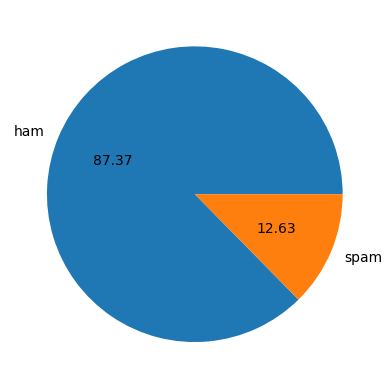

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install nltk

In [ ]:
df['num_character']=df['text'].apply(len) #length in terms of character

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#this is for ham messages
df[df['target'] == 0][['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#this is for spam messages
df[df['target'] == 1][['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

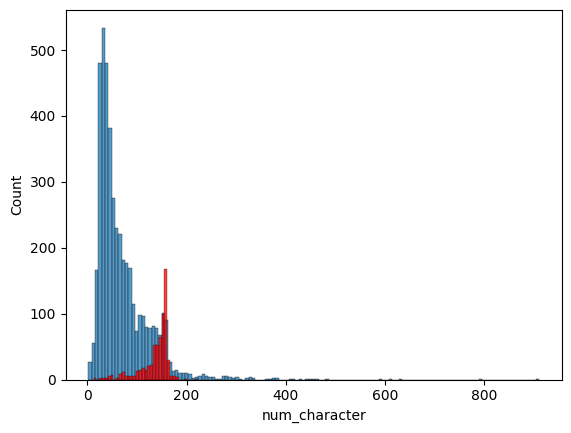

In [ ]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')


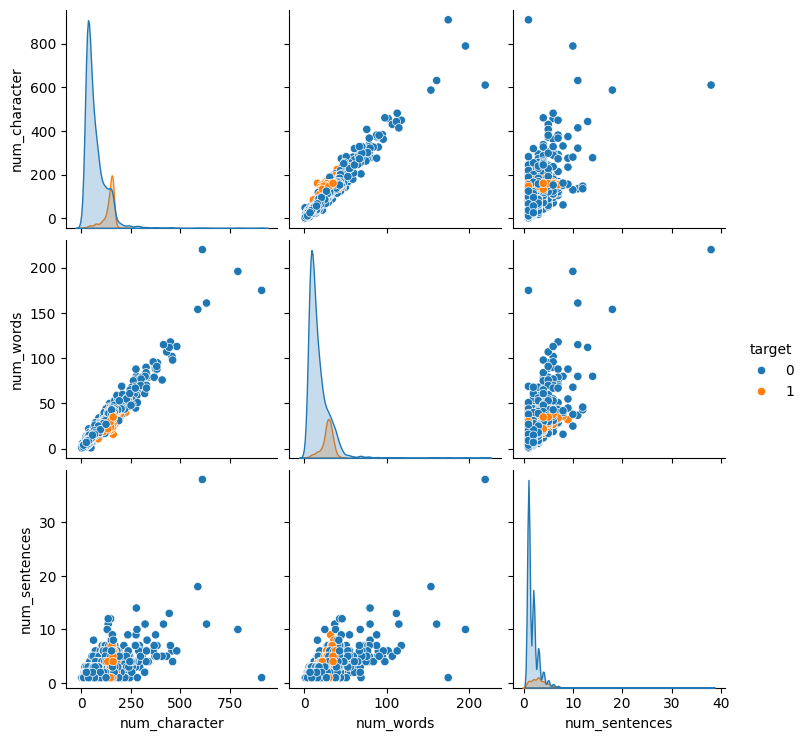

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-218-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

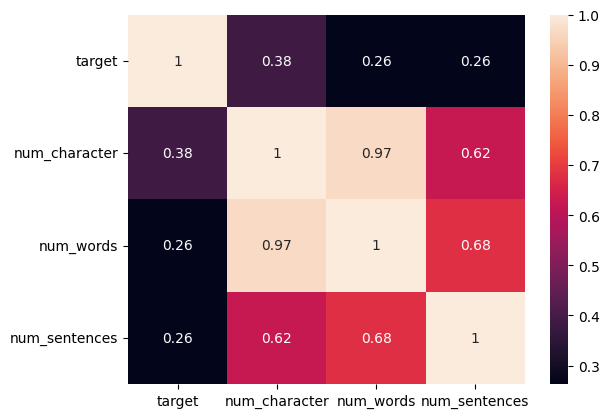

In [ ]:
sns.heatmap(df.corr(),annot=True)

3.DATA **PREPROCESSING**
*   lower case
*   Tokenization
*  removing special characters
*   removing stop words and punctuations
*   stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
def transform_text(text):
     text=text.lower()
     text=nltk.word_tokenize(text)

     y=[]
     for i in text:
       if i.isalnum():
            y.append(i)
     text = y[:] #  clonning karna aisa hota hein because list is mutable y ke clear hone pe text bhi clear ho jaeyge
     y.clear()
     for i in text:
          if i not in stopwords.words('english') and i not in string.punctuation:
               y.append(i)
     text=y[:]
     y.clear()

     for i in text:
        y.append(ps.stem(i))

     return " ".join(y)

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

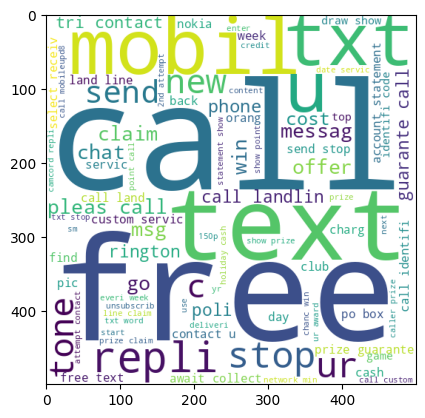

In [ ]:
plt.imshow(spam_wc)

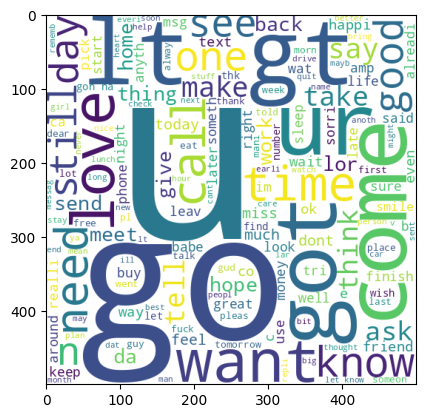

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.imshow(spam_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

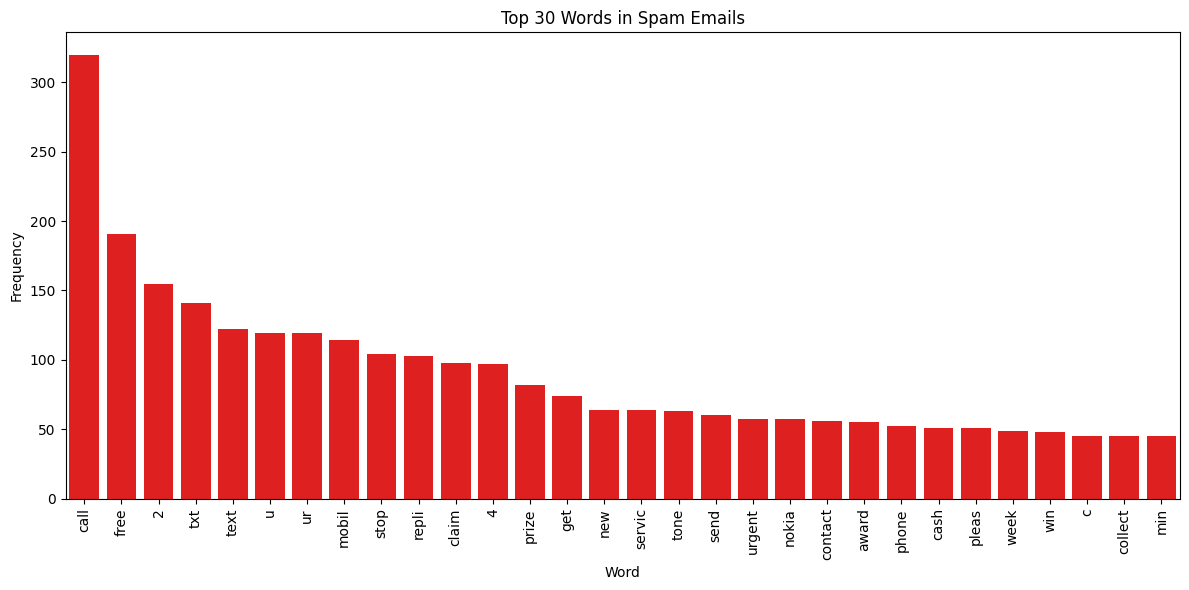

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have created spam_corpus and ham_corpus as mentioned

# Calculate word frequencies for spam emails
spam_word_counts = Counter(spam_corpus)

# Extract the most common 30 words and their frequencies for spam
most_common_spam = spam_word_counts.most_common(30)

# Convert to DataFrame for Seaborn
spam_data = pd.DataFrame(most_common_spam, columns=['Word', 'Frequency'])

# Plotting with Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Word', y='Frequency', data=spam_data, color='red')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Words in Spam Emails')
plt.tight_layout()  # Adjust layout to prevent cutoff of labels
plt.show()


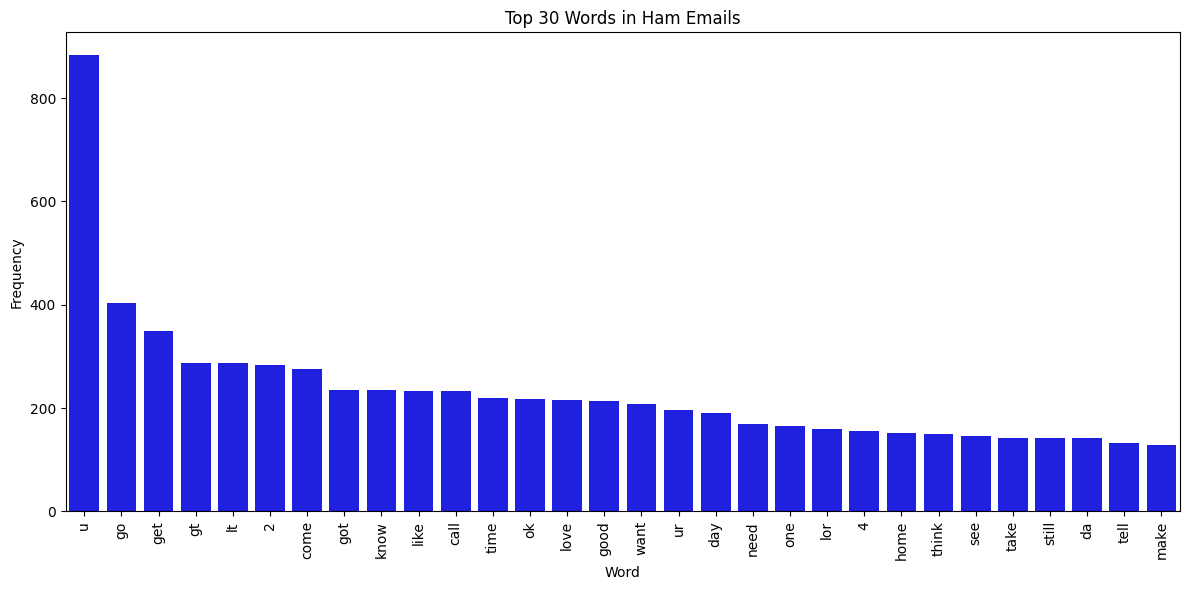

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have created spam_corpus and ham_corpus as mentioned

# Calculate word frequencies for ham emails
ham_word_counts = Counter(ham_corpus)

# Extract the most common 30 words and their frequencies for ham
most_common_ham = ham_word_counts.most_common(30)

# Convert to DataFrame for Seaborn
ham_data = pd.DataFrame(most_common_ham, columns=['Word', 'Frequency'])

# Plotting with Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Word', y='Frequency', data=ham_data, color='blue')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Words in Ham Emails')
plt.tight_layout()  # Adjust layout to prevent cutoff of labels
plt.show()


4.MODEL BUILDING


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
# precisoion matters  here the most so hum mnb ko rakhenge..
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))